# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import linear_model

## Load Data

In [2]:
salary = pd.read_csv('data/salary_data.csv')

In [3]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0



## Extract data

In [4]:
X = salary.loc[:, ['YearsExperience']].values

In [5]:
y = salary.loc[:, ['Salary']].values

## Plot the data

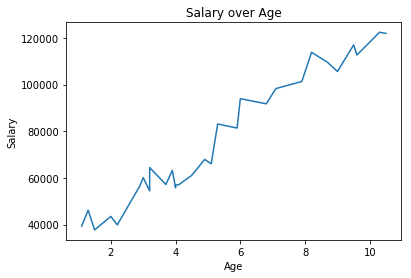

In [6]:
plt.plot(X, y)
plt.title('Salary over Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

## Split data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Create the model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Calculate score

In [11]:
lr.score(X_test, y_test)

0.94144662271782142

In [12]:
lr.intercept_

array([ 25918.43833489])

In [13]:
lr.coef_

array([[ 9339.08172382]])

In [14]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, y_test))

Coefficients: 
 [[ 9339.08172382]]
Mean squared error: 37784662.47
Variance score: 0.94


## Let's see how our prediction line looks like

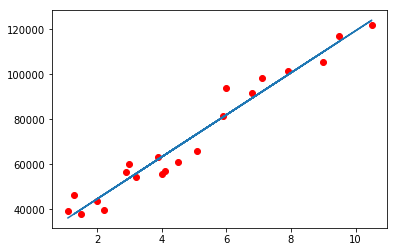

In [25]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lr.predict(X_train))
plt.show()

In [21]:
lr.predict(14)

array([[ 156665.58246831]])

## Let's try higher degree

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [17]:
polynomial_features = PolynomialFeatures(degree=7, include_bias=False)
linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=7, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [18]:
pipeline.score(X_test, y_test)

0.91999926421940281

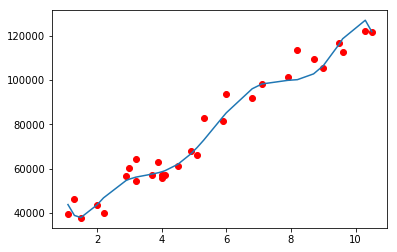

In [24]:
plt.scatter(X, y, c='red')
plt.plot(X, pipeline.predict(X))
plt.show()